In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd
import geoplot

In [ ]:
#fiona.listlayers("../raw_data/ACS_2017_5YR_ZCTA.gdb")

In [ ]:
#test = gpd.read_file("../raw_data/ACS_2017_5YR_ZCTA.gdb", driver='FileGDB', layer='X01_AGE_AND_SEX')

In [ ]:
#test2 = gpd.read_file("../raw_data/ACS_2017_5YR_ZCTA.gdb", driver='FileGDB', layer='METADATA_ZCTA_2017')

In [ ]:
#test2.head()

In [30]:
census_zip_map = gpd.read_file("../raw_data/tl_2019_us_zcta510/tl_2019_us_zcta510.shp")

In [33]:
test2 = gpd.read_file("../raw_data/CENSUS2010_BLK_BG_TRCT_SHP/CENSUS2010BLOCKGROUPS_POLY.shp")

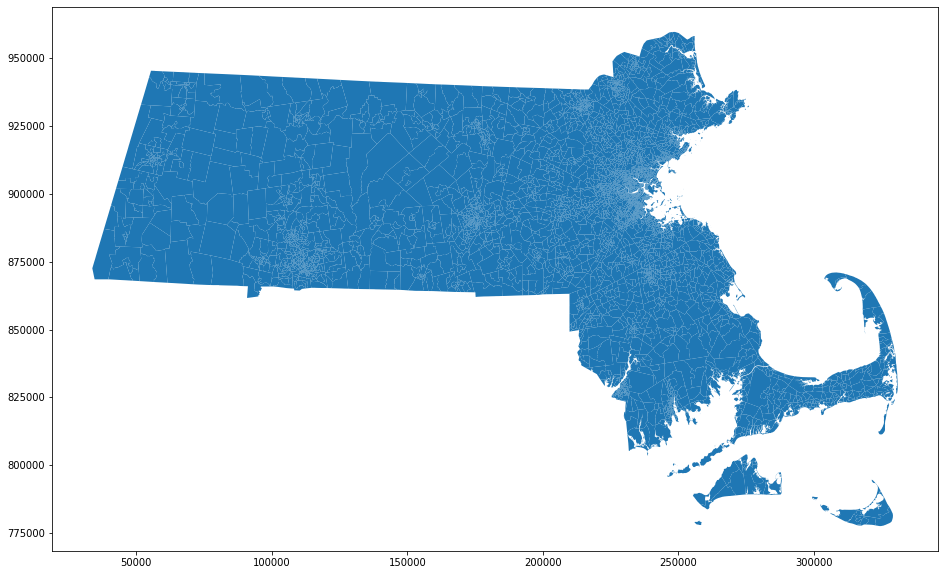

In [3]:
test2.plot(figsize=(16,10))
plt.show()

In [4]:
test2.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,"POLYGON ((245073.4579000026 857943.9572999999,..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,"POLYGON ((242521.254900001 859747.8350999989, ..."
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,"POLYGON ((244276.8404999971 862120.2314999998,..."
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,"POLYGON ((241369.4518999979 874137.570700001, ..."
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,"POLYGON ((240747.7463999987 873189.6048000008,..."


In [34]:
len(set(test2['STATEFP10']))

1

In [56]:
test2.centroid

0       POINT (243856.7307279073 858308.2978385694)
1       POINT (242004.2566174036 857829.7623223617)
2       POINT (244160.0989660571 861561.0733446195)
3       POINT (241130.6851021084 873574.4539211198)
4        POINT (240478.7043746133 873576.766094962)
                           ...                     
4974    POINT (220871.0017059101 903744.6238342092)
4975     POINT (219161.888538077 904573.1800747254)
4976    POINT (220925.3812396218 908750.4570000421)
4977    POINT (221112.5218854096 909904.2682672604)
4978    POINT (222168.4020127971 910558.5005188676)
Length: 4979, dtype: object

In [57]:
points = test2.copy()
# change geometry 
points['geometry'] = points['geometry'].centroid
points.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,POINT (243856.7307279073 858308.2978385694)
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,POINT (242004.2566174036 857829.7623223617)
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,POINT (244160.0989660571 861561.0733446195)
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,POINT (241130.6851021084 873574.4539211198)
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,POINT (240478.7043746133 873576.766094962)


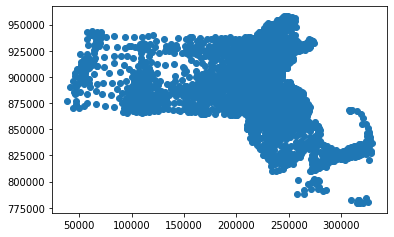

In [58]:
points.plot()

In [2]:
test3 = gpd.read_file("../raw_data/townssurvey_shp/TOWNSSURVEY_POLYM.shp")

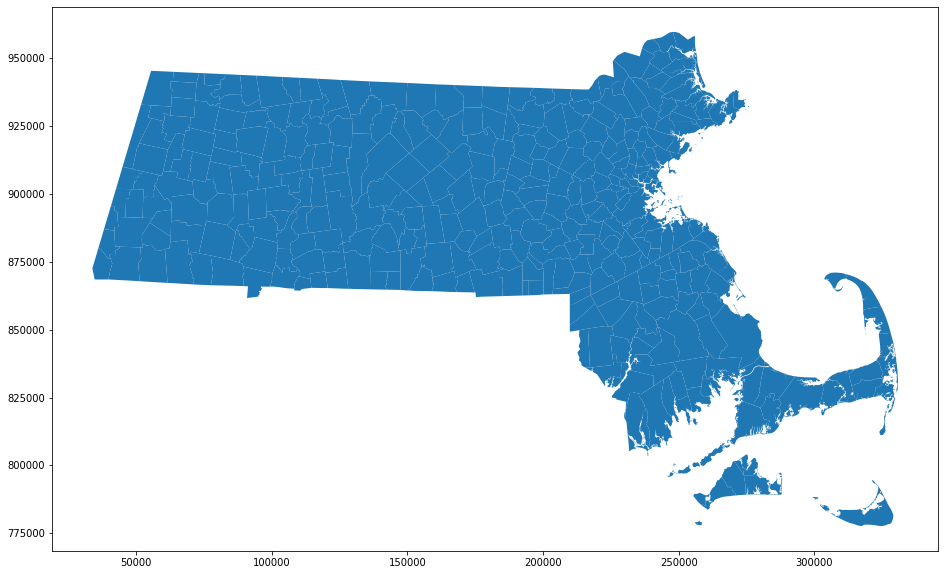

In [5]:
test3.plot(figsize=(16,10))

In [6]:
test3.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,SHAPE_Leng,SHAPE_Area,geometry
0,WELLESLEY,317,26658,26615,26604,-43,-11,T,2,25021,6749.852,10.547,27982,1378,26738.594369,2.726958e+07,"(POLYGON ((219129.012500003 897474.7045999989,..."
1,NEEDHAM,199,27310,27557,28924,247,1367,T,4,25021,8130.187,12.703,28886,-38,28960.012825,3.294777e+07,"POLYGON ((222991.1424999982 895149.4145999998,..."
2,PETERSHAM,234,997,1131,1180,134,49,T,3,25027,43675.599,68.243,1234,54,73405.706629,1.767489e+08,"POLYGON ((150592.6525000036 914968.5846000016,..."
3,READING,246,22545,22539,23708,-6,1169,T,3,25017,6393.727,9.990,24747,1039,23126.471303,2.587450e+07,"POLYGON ((232551.0625 923891.9946000017, 23344..."
4,QUINCY,243,83682,84985,88025,1303,3040,C,3,25021,11080.397,17.313,92271,4246,87188.934275,4.484078e+07,"(POLYGON ((242254.612499997 895020.5045999996,..."


In [7]:
test2.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,"POLYGON ((245073.4579000026 857943.9572999999,..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,"POLYGON ((242521.254900001 859747.8350999989, ..."
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,"POLYGON ((244276.8404999971 862120.2314999998,..."
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,"POLYGON ((241369.4518999979 874137.570700001, ..."
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,"POLYGON ((240747.7463999987 873189.6048000008,..."


In [3]:
death_data = pd.read_csv("../clean_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")

In [9]:
death_data.head()

,city_death,2014,2015,2016,2017,2018
0,abington,0,6,1,3,5
1,acton,1,2,3,0,1
2,acushnet,0,4,2,4,0
3,adams,2,3,1,0,4
4,agawam,1,2,0,4,8


In [10]:
death_data.shape

(351, 6)

In [11]:
len(set(test3['TOWN']))

351

In [12]:
print(set(test3['TOWN'].str.lower()) - set(death_data['city_death']))
print(set(death_data['city_death']) - set(test3['TOWN'].str.lower()))

{'north attleborough'}
{'north attleboro'}


In [13]:
death_data[death_data['city_death'] == 'north attleboro']

,city_death,2014,2015,2016,2017,2018
210,north attleboro,1,6,4,4,3


In [4]:
death_data['city_death'] = death_data['city_death'].replace('north attleboro', 'north attleborough')

In [15]:
print(set(test3['TOWN'].str.lower()) - set(death_data['city_death']))

set()


In [13]:
test3['TOWN'] = test3['TOWN'].str.lower()

In [17]:
test3.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,SUM_ACRES,SUM_SQUARE,POP2010,POPCH00_10,SHAPE_Leng,SHAPE_Area,geometry
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,6749.852,10.547,27982,1378,26738.594369,2.726958e+07,"(POLYGON ((219129.012500003 897474.7045999989,..."
1,needham,199,27310,27557,28924,247,1367,T,4,25021,8130.187,12.703,28886,-38,28960.012825,3.294777e+07,"POLYGON ((222991.1424999982 895149.4145999998,..."
2,petersham,234,997,1131,1180,134,49,T,3,25027,43675.599,68.243,1234,54,73405.706629,1.767489e+08,"POLYGON ((150592.6525000036 914968.5846000016,..."
3,reading,246,22545,22539,23708,-6,1169,T,3,25017,6393.727,9.990,24747,1039,23126.471303,2.587450e+07,"POLYGON ((232551.0625 923891.9946000017, 23344..."
4,quincy,243,83682,84985,88025,1303,3040,C,3,25021,11080.397,17.313,92271,4246,87188.934275,4.484078e+07,"(POLYGON ((242254.612499997 895020.5045999996,..."


In [14]:
test_merge = test3.merge(death_data, how='left', left_on='TOWN', right_on='city_death')

In [19]:
print(len(set(test_merge['TOWN'])))
print(len(set(test_merge['city_death'])))
print(sum(test_merge['TOWN'] == test_merge['city_death']))

351
351
351


In [15]:
test_merge.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,POPCH00_10,SHAPE_Leng,SHAPE_Area,geometry,city_death,2014,2015,2016,2017,2018
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,1378,26738.594369,2.726958e+07,"(POLYGON ((219129.012500003 897474.7045999989,...",wellesley,0,1,0,0,0
1,needham,199,27310,27557,28924,247,1367,T,4,25021,...,-38,28960.012825,3.294777e+07,"POLYGON ((222991.1424999982 895149.4145999998,...",needham,0,1,2,1,0
2,petersham,234,997,1131,1180,134,49,T,3,25027,...,54,73405.706629,1.767489e+08,"POLYGON ((150592.6525000036 914968.5846000016,...",petersham,0,0,0,0,0
3,reading,246,22545,22539,23708,-6,1169,T,3,25017,...,1039,23126.471303,2.587450e+07,"POLYGON ((232551.0625 923891.9946000017, 23344...",reading,2,2,4,4,1
4,quincy,243,83682,84985,88025,1303,3040,C,3,25021,...,4246,87188.934275,4.484078e+07,"(POLYGON ((242254.612499997 895020.5045999996,...",quincy,39,43,36,37,35


In [23]:
ma_town_coord = pd.DataFrame({'town':test_merge['TOWN'].copy(), 'x': test_merge.centroid.x, 'y': test_merge.centroid.y})

In [28]:
ma_death_data_w_coord =  ma_town_coord.merge(death_data, how='left', left_on='town', right_on='city_death').drop('city_death', axis=1)

In [29]:
ma_death_data_w_coord.head()

,town,x,y,2014,2015,2016,2017,2018
0,wellesley,217690.195792,894891.595084,0,1,0,0,0
1,needham,221355.875569,892354.069683,0,1,2,1,0
2,petersham,140689.070135,912377.857126,0,0,0,0,0
3,reading,232402.473650,920575.007121,2,2,4,4,1
4,quincy,239580.364386,889002.184693,39,43,36,37,35


In [31]:
#ma_death_data_w_coord.to_csv("../clean_data/ma_death_count_w_coord.csv")

In [53]:
type(test_merge)

geopandas.geodataframe.GeoDataFrame

In [26]:
print(test_merge.crs)
print(test2.crs)

{'init': 'epsg:26986'}
{'init': 'epsg:26986'}


In [42]:
test4 = gpd.sjoin(test_merge, test2, how='left', op='contains')

In [59]:
cent_join = gpd.sjoin(test_merge, points, how='left', op='contains')

In [60]:
cent_join.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,6915627.43,158.7610,935.0,312.0,0141603,123495.0,0007242,0123495,6.424854e+05,3974.741554
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12570438.33,288.5776,989.0,336.0,0141606,123498.0,0007244,0123498,1.167837e+06,7045.788286
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12729296.94,292.2244,968.0,326.0,0141607,123499.0,0007245,0123499,1.182595e+06,7617.310394
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,11623164.46,266.8311,1145.0,425.0,0141602,123494.0,0007241,0123494,1.079832e+06,5241.365474
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,5711898.47,131.1271,664.0,237.0,0141608,123500.0,0007246,0123500,5.306549e+05,4159.676651


In [61]:
cent_join.shape

(4958, 45)

In [63]:
test2.shape

(4979, 22)

In [64]:
cent_join.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,6915627.43,158.7610,935.0,312.0,0141603,123495.0,0007242,0123495,6.424854e+05,3974.741554
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12570438.33,288.5776,989.0,336.0,0141606,123498.0,0007244,0123498,1.167837e+06,7045.788286
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12729296.94,292.2244,968.0,326.0,0141607,123499.0,0007245,0123499,1.182595e+06,7617.310394
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,11623164.46,266.8311,1145.0,425.0,0141602,123494.0,0007241,0123494,1.079832e+06,5241.365474
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,5711898.47,131.1271,664.0,237.0,0141608,123500.0,0007246,0123500,5.306549e+05,4159.676651


In [67]:
cent_join_sub = cent_join[['TOWN', 'POP2010', 'SHAPE_Area', 'GEOID10', 'SHAPE_AREA', 'POP100_RE']].copy()

In [68]:
cent_join_sub.head()

,TOWN,POP2010,SHAPE_Area,GEOID10,SHAPE_AREA,POP100_RE
0,wellesley,27982,2.726958e+07,250214041003,6.424854e+05,935.0
0,wellesley,27982,2.726958e+07,250214042012,1.167837e+06,989.0
0,wellesley,27982,2.726958e+07,250214042013,1.182595e+06,968.0
0,wellesley,27982,2.726958e+07,250214041002,1.079832e+06,1145.0
0,wellesley,27982,2.726958e+07,250214042014,5.306549e+05,664.0


In [73]:
cent_join_block_sum = cent_join_sub.groupby('TOWN').sum()[['POP100_RE']].reset_index()

In [74]:
cent_join_block_sum.head()

,TOWN,POP100_RE
0,abington,15985.0
1,acton,21924.0
2,acushnet,10303.0
3,adams,8485.0
4,agawam,27621.0


In [76]:
cent_join_block_sum.shape

(351, 2)

In [78]:
cent_join_sum_to_exp = cent_join_sub[['TOWN', 'POP2010']].drop_duplicates().merge(cent_join_block_sum, on='TOWN', how='inner')

In [79]:
import seaborn as sns

,TOWN,POP2010,POP100_RE
0,wellesley,27982,27982.0
1,needham,28886,28886.0
2,petersham,1234,1234.0
3,reading,24747,24747.0
4,quincy,92271,89703.0


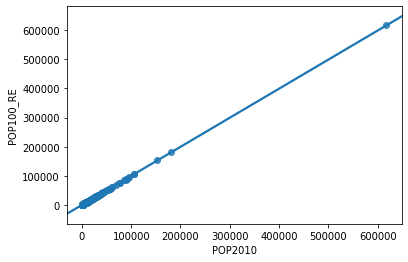

In [83]:
display(cent_join_sum_to_exp.head())
sns.regplot(x='POP2010', y='POP100_RE', data=cent_join_sum_to_exp)

In [95]:
cent_join_sum_to_exp['error'] = (abs(cent_join_sum_to_exp['POP100_RE'] - cent_join_sum_to_exp['POP2010']) * 100) / cent_join_sum_to_exp['POP2010']

In [96]:
cent_join_sum_to_exp.head()

,TOWN,POP2010,POP100_RE,error
0,wellesley,27982,27982.0,0.000000
1,needham,28886,28886.0,0.000000
2,petersham,1234,1234.0,0.000000
3,reading,24747,24747.0,0.000000
4,quincy,92271,89703.0,2.783106


In [97]:
cent_join_sum_to_exp.sort_values('error', ascending=False)

,TOWN,POP2010,POP100_RE,error
112,mount washington,167,1392.0,733.532934
63,middlefield,521,1677.0,221.880998
62,rowe,393,1220.0,210.432570
59,hawley,337,897.0,166.172107
271,leyden,711,1822.0,156.258790
...,...,...,...,...
129,brewster,9820,9820.0,0.000000
126,florida,752,752.0,0.000000
124,belchertown,14649,14649.0,0.000000
123,marlborough,38499,38499.0,0.000000


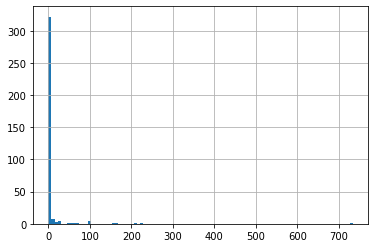

In [98]:
cent_join_sum_to_exp['error'].hist(bins=100)

In [101]:
cent_join_sum_to_exp[cent_join_sum_to_exp['error'] > 20].shape

(18, 4)

In [102]:
cent_join_sum_to_exp[cent_join_sum_to_exp['error'] > 20]

,TOWN,POP2010,POP100_RE,error
22,north brookfield,4680,6003.0,28.269231
38,egremont,1225,0.0,100.000000
59,hawley,337,897.0,166.172107
62,rowe,393,1220.0,210.432570
63,middlefield,521,1677.0,221.880998
87,warwick,780,971.0,24.487179
95,colrain,1671,1195.0,28.485937
112,mount washington,167,1392.0,733.532934
114,hull,10293,7584.0,26.318857
127,worthington,1156,0.0,100.000000


In [103]:
cent_join_sub.head()

,TOWN,POP2010,SHAPE_Area,GEOID10,SHAPE_AREA,POP100_RE
0,wellesley,27982,2.726958e+07,250214041003,6.424854e+05,935.0
0,wellesley,27982,2.726958e+07,250214042012,1.167837e+06,989.0
0,wellesley,27982,2.726958e+07,250214042013,1.182595e+06,968.0
0,wellesley,27982,2.726958e+07,250214041002,1.079832e+06,1145.0
0,wellesley,27982,2.726958e+07,250214042014,5.306549e+05,664.0


In [104]:
cent_join_sub.to_csv("../")

351

In [43]:
test4.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12570438.33,288.5776,989.0,336.0,0141606,123498.0,0007244,0123498,1.167837e+06,7045.788286
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,6915627.43,158.7610,935.0,312.0,0141603,123495.0,0007242,0123495,6.424854e+05,3974.741554
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,3766464.38,86.4661,851.0,454.0,0141627,123519.0,0007261,0123519,3.499174e+05,2789.231412
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,9577142.49,219.8609,1088.0,496.0,0141624,123516.0,0007258,0123516,8.897492e+05,4904.416221
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,11152934.53,256.0361,1845.0,746.0,0141620,123512.0,0007255,0123512,1.036146e+06,4375.763676


In [44]:
test4.shape

(2608, 45)

In [45]:
test4.columns

Index(['TOWN', 'TOWN_ID', 'POP1980', 'POP1990', 'POP2000', 'POPCH80_90',
       'POPCH90_00', 'TYPE', 'FOURCOLOR', 'FIPS_STCO', 'SUM_ACRES',
       'SUM_SQUARE', 'POP2010', 'POPCH00_10', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'city_death', '2014', '2015', '2016', '2017', '2018',
       'index_right', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10',
       'GEOID10', 'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN'],
      dtype='object')

In [48]:
len(set(test2['GEOID10']))

4979

In [52]:
test4['GEOID10'].value_counts().reset_index().sort_values('GEOID10', ascending=False)

,index,GEOID10
0,250214563012,1
1646,250056301022,1
1639,250173363003,1
1640,250173681013,1
1641,250251106074,1
...,...,...
823,250056134002,1
824,250056516001,1
825,250250608002,1
826,250214180025,1


In [53]:
test4.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12570438.33,288.5776,989.0,336.0,0141606,123498.0,0007244,0123498,1.167837e+06,7045.788286
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,6915627.43,158.7610,935.0,312.0,0141603,123495.0,0007242,0123495,6.424854e+05,3974.741554
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,3766464.38,86.4661,851.0,454.0,0141627,123519.0,0007261,0123519,3.499174e+05,2789.231412
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,9577142.49,219.8609,1088.0,496.0,0141624,123516.0,0007258,0123516,8.897492e+05,4904.416221
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,11152934.53,256.0361,1845.0,746.0,0141620,123512.0,0007255,0123512,1.036146e+06,4375.763676


In [54]:
test4.columns

Index(['TOWN', 'TOWN_ID', 'POP1980', 'POP1990', 'POP2000', 'POPCH80_90',
       'POPCH90_00', 'TYPE', 'FOURCOLOR', 'FIPS_STCO', 'SUM_ACRES',
       'SUM_SQUARE', 'POP2010', 'POPCH00_10', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'city_death', '2014', '2015', '2016', '2017', '2018',
       'index_right', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10',
       'GEOID10', 'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN'],
      dtype='object')

In [55]:
test4[['TOWN', 'POP2010', 'SHAPE_Area', 'GEOID10', 'SHAPE_AREA']]

,TOWN,POP2010,SHAPE_Area,GEOID10,SHAPE_AREA
0,wellesley,27982,2.726958e+07,250214042012,1.167837e+06
0,wellesley,27982,2.726958e+07,250214041003,6.424854e+05
0,wellesley,27982,2.726958e+07,250214044004,3.499174e+05
0,wellesley,27982,2.726958e+07,250214044001,8.897492e+05
0,wellesley,27982,2.726958e+07,250214043021,1.036146e+06
...,...,...,...,...,...
350,boston,617594,1.295200e+08,250251104035,2.157191e+05
350,boston,617594,1.295200e+08,250251401062,5.936179e+04
350,boston,617594,1.295200e+08,250251011023,1.646065e+05
350,boston,617594,1.295200e+08,250251010011,2.598023e+05


In [41]:
test2.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,023,525104,2,250235251042,Block Group 2,G5030,2648651.0,119260.0,+41.9751132,...,683.9256,1120,404,0159334,137632,0007882,0137632,2.767760e+06,8963.749528,"POLYGON ((245073.4579000026 857943.9572999999,..."
1,25,023,525104,4,250235251044,Block Group 4,G5030,4625818.0,11563.0,+41.9677679,...,1145.8539,2178,690,0159336,137634,0007884,0137634,4.637125e+06,9555.602586,"POLYGON ((242521.254900001 859747.8350999989, ..."
2,25,023,525203,1,250235252031,Block Group 1,G5030,2367037.0,62136.0,+42.0051872,...,600.2231,1540,527,0159338,137636,0007885,0137636,2.429027e+06,9226.194871,"POLYGON ((244276.8404999971 862120.2314999998,..."
3,25,023,510100,2,250235101002,Block Group 2,G5030,686351.0,0.0,+42.1115078,...,169.5890,1172,414,0159161,137459,0007745,0137459,6.863050e+05,3338.839737,"POLYGON ((241369.4518999979 874137.570700001, ..."
4,25,023,510100,3,250235101003,Block Group 3,G5030,403906.0,0.0,+42.1115626,...,99.8001,792,290,0159162,137460,0007746,0137460,4.038783e+05,3178.436538,"POLYGON ((240747.7463999987 873189.6048000008,..."


In [36]:
test4.columns

Index(['TOWN', 'TOWN_ID', 'POP1980', 'POP1990', 'POP2000', 'POPCH80_90',
       'POPCH90_00', 'TYPE', 'FOURCOLOR', 'FIPS_STCO', 'SUM_ACRES',
       'SUM_SQUARE', 'POP2010', 'POPCH00_10', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'city_death', '2014', '2015', '2016', '2017', '2018',
       'index_right', 'STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10',
       'GEOID10', 'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN'],
      dtype='object')

In [30]:
test_merge.columns

Index(['TOWN', 'TOWN_ID', 'POP1980', 'POP1990', 'POP2000', 'POPCH80_90',
       'POPCH90_00', 'TYPE', 'FOURCOLOR', 'FIPS_STCO', 'SUM_ACRES',
       'SUM_SQUARE', 'POP2010', 'POPCH00_10', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'city_death', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [31]:
test2.columns

Index(['STATEFP10', 'COUNTYFP10', 'TRACTCE10', 'BLKGRPCE10', 'GEOID10',
       'NAMELSAD10', 'MTFCC10', 'ALAND10', 'AWATER10', 'INTPTLAT10',
       'INTPTLON10', 'AREA_SQFT', 'AREA_ACRES', 'POP100_RE', 'HU100_RE',
       'LOGPL94171', 'LOGSF1', 'LOGACS0610', 'LOGSF1C', 'SHAPE_AREA',
       'SHAPE_LEN', 'geometry'],
      dtype='object')

In [35]:
test4.shape

(8697, 45)

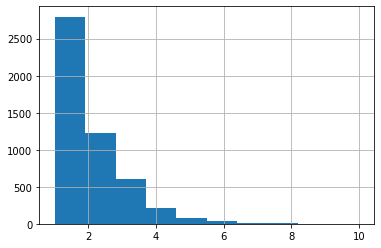

In [41]:
test4['GEOID10'].value_counts().hist()

In [34]:
print(len(set(test2['GEOID10'])))
print(len(test2['GEOID10']))

4979
4979


In [44]:
block_count = test4['GEOID10'].value_counts().reset_index()

In [45]:
block_count[block_count['GEOID10'] != 1]

,index,GEOID10
0,250110401004,10
1,250158227003,9
2,250110406003,9
3,250039322001,8
4,250039313001,8
...,...,...
2178,250173508002,2
2179,250056102034,2
2180,250092506004,2
2181,250056304002,2


In [49]:
test5 = gpd.sjoin(test_merge, test2, how='left', op='contains')

In [50]:
test5.shape

(2608, 45)

In [52]:
test5.head()

,TOWN,TOWN_ID,POP1980,POP1990,POP2000,POPCH80_90,POPCH90_00,TYPE,FOURCOLOR,FIPS_STCO,...,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,12570438.33,288.5776,989.0,336.0,0141606,123498.0,0007244,0123498,1.167837e+06,7045.788286
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,6915627.43,158.7610,935.0,312.0,0141603,123495.0,0007242,0123495,6.424854e+05,3974.741554
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,3766464.38,86.4661,851.0,454.0,0141627,123519.0,0007261,0123519,3.499174e+05,2789.231412
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,9577142.49,219.8609,1088.0,496.0,0141624,123516.0,0007258,0123516,8.897492e+05,4904.416221
0,wellesley,317,26658,26615,26604,-43,-11,T,2,25021,...,11152934.53,256.0361,1845.0,746.0,0141620,123512.0,0007255,0123512,1.036146e+06,4375.763676


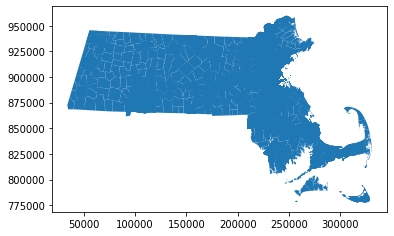

In [55]:
test5.plot(cmap=None)

In [26]:
postal_zip_map = gpd.read_file("../raw_data/zipcodes_nt/ZIPCODES_NT_POLY.shp")

In [27]:
postal_zip_map.head()

,POSTCODE,PC_NAME,PC_TYPE,PA_NAME,PA_FIPS,CITY_TOWN,COUNTY,AREA_SQMI,SHAPE_AREA,SHAPE_LEN,geometry
0,01331,ATHOL,NON UNIQUE,ATHOL,02515,"ATHOL, TOWN OF",WORCESTER,58.084870,1.504391e+08,66459.581259,"POLYGON ((147583.6014999971 930766.1334999986,..."
1,01085,WESTFIELD,NON UNIQUE,WESTFIELD,76030,WESTFIELD,HAMPDEN,55.938928,1.448812e+08,61329.577100,"POLYGON ((101952.2437999994 882113.238499999, ..."
2,01370,SHELBURNE FALLS,NON UNIQUE,SHELBURNE FALLS,61205,"SHELBURNE, TOWN OF",FRANKLIN,48.804057,1.264019e+08,70885.011312,"POLYGON ((107090.9670000002 933358.561999999, ..."
3,01235,HINSDALE,NON UNIQUE,HINSDALE,30280,"HINSDALE, TOWN OF",BERKSHIRE,47.757052,1.236902e+08,49286.404925,"POLYGON ((77728.64249999821 914027.9114000015,..."
4,02747,NORTH DARTMOUTH,NON UNIQUE,NORTH DARTMOUTH,47450,"DARTMOUTH, TOWN OF",BRISTOL,47.495414,1.230126e+08,66614.835420,"POLYGON ((242894.990199998 830521.8995000012, ..."


In [28]:
postal_zip_map.shape

(549, 11)

In [29]:
len(set(postal_zip_map['CITY_TOWN']))

335

In [31]:
census_zip_map.head()

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,43451,43451,B5,G6350,S,63484186,157689,+41.3183010,-083.6174935,"POLYGON ((-83.708733 41.327326, -83.708147 41...."
1,43452,43452,B5,G6350,S,121522304,13721730,+41.5157923,-082.9809454,"POLYGON ((-83.086978 41.537796, -83.0825629999..."
2,43456,43456,B5,G6350,S,9320975,1003775,+41.6318300,-082.8393923,"(POLYGON ((-82.835577 41.710823, -82.83515 41...."
3,43457,43457,B5,G6350,S,48004681,0,+41.2673301,-083.4274872,"POLYGON ((-83.49650299999999 41.253708, -83.48..."
4,43458,43458,B5,G6350,S,2573816,39915,+41.5304461,-083.2133648,"POLYGON ((-83.222292 41.531025, -83.2222819999..."


In [33]:
len(set(census_zip_map['GEOID10']))

33144

In [35]:
set(census_zip_map['ZCTA5CE10'])

{'67622',
 '92270',
 '55738',
 '87102',
 '68345',
 '04222',
 '42053',
 '31408',
 '23843',
 '71426',
 '24538',
 '13421',
 '50612',
 '32534',
 '85264',
 '96111',
 '61814',
 '35652',
 '30275',
 '24102',
 '23508',
 '97731',
 '16617',
 '62885',
 '27881',
 '76110',
 '95426',
 '93405',
 '56537',
 '32606',
 '61425',
 '33523',
 '53522',
 '65767',
 '33709',
 '46747',
 '38646',
 '45502',
 '11435',
 '18045',
 '76877',
 '56211',
 '29470',
 '15721',
 '12430',
 '47523',
 '78226',
 '27022',
 '97641',
 '67017',
 '95428',
 '73170',
 '98004',
 '34688',
 '47386',
 '11372',
 '82336',
 '86015',
 '26260',
 '56359',
 '23440',
 '24598',
 '01854',
 '49464',
 '56440',
 '67149',
 '74358',
 '77486',
 '36089',
 '62357',
 '41094',
 '95661',
 '67851',
 '65109',
 '93660',
 '96097',
 '62030',
 '91708',
 '68338',
 '55043',
 '53503',
 '11209',
 '75493',
 '68422',
 '78852',
 '23093',
 '74833',
 '24171',
 '60143',
 '16052',
 '71409',
 '64633',
 '75835',
 '99549',
 '78140',
 '06096',
 '98855',
 '11379',
 '66842',
 '29510',


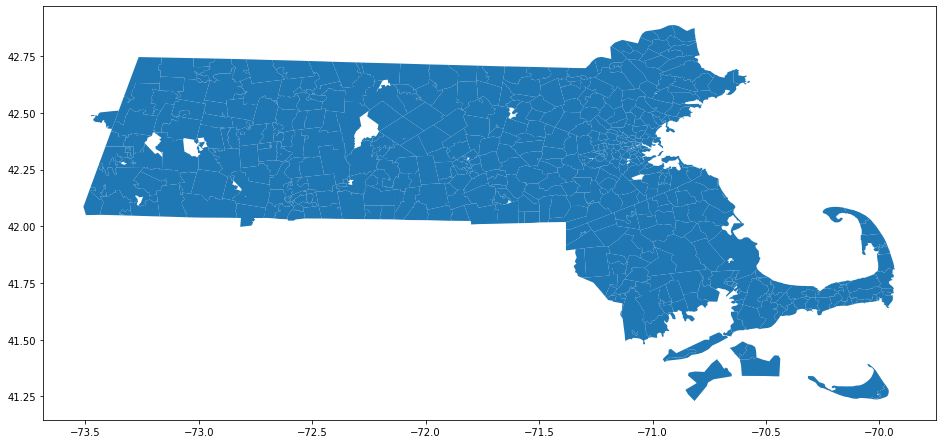

In [38]:
census_zip_map[census_zip_map['ZCTA5CE10'].isin(set(postal_zip_map['POSTCODE']))].plot(figsize=(16,10))